<a href="https://colab.research.google.com/github/CaioSepulveda/Employee_Turnover_Analysis/blob/main/Employee_Turnover_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Employee Turnover Analysis

This project explores employee turnover based on various organizational and behavioral factors. Using a public HR dataset, we investigate which groups of employees are more likely to leave the company.

---

## 📥 Data Loading and Overview

We load and briefly explore the dataset to understand its structure and variables.

## 🧹 Data Cleaning

- Removing duplicates
- Checking for null values
- Standardizing text and column names


In [7]:
data = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Datasets/HR_capstone_dataset.csv')
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.drop_duplicates(inplace=True)

In [38]:
data.isna().any()

,0
satisfaction_level,False
last_evaluation,False
number_project,False
average_montly_hours,False
time_spend_company,False
Work_accident,False
left,False
promotion_last_5years,False
Department,False
salary,False


In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [37]:
text_cols = data.select_dtypes(include='object').columns

for col in text_cols:
    data[col] = data[col].str.strip().str.lower().str.capitalize()


In [43]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,0.37,0.52,2,159,3,0,1,0,Sales,Low


In [34]:
total_employees = len(data)

employess_left = data['left'].sum()

print('Total Employees', total_employees)
print('Employees Left', employess_left)

Total Employees 14999
Employees Left 3571


In [ ]:
General_Turnover_rate = employess_left / total_employees * 100

print('General Turnover Rate:', General_Turnover_rate,'%')

General Turnover Rate: 23.80825388359224 %


In [49]:
Turnover_rate_by_department = data.groupby('Department')['left'].mean() * 100

Turnover_rate_by_department_sorted = Turnover_rate_by_department.sort_values(ascending=False)

print(Turnover_rate_by_department_sorted)

Department
Hr             29.093369
Accounting     26.597132
Technical      25.625000
Support        24.899058
Sales          24.492754
Marketing      23.659674
It             22.249389
Product_mng    21.951220
Randd          15.374841
Management     14.444444
Name: left, dtype: float64


📌 *High turnover in Sales and HR departments may indicate workload or retention issues. These should be investigated to improve organizational climate.*


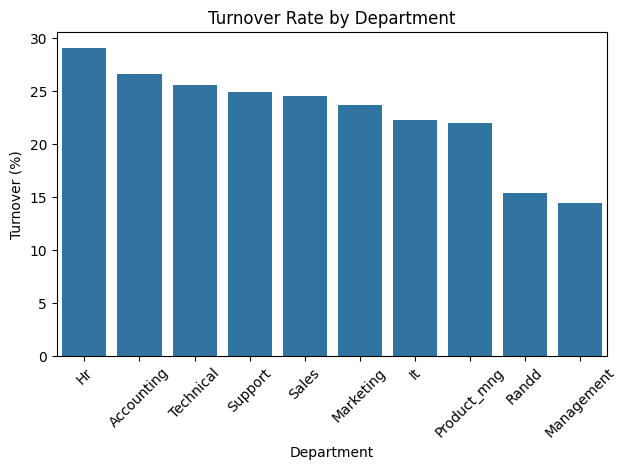

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Turnover by departament
sns.barplot(x=Turnover_rate_by_department_sorted.index, y=Turnover_rate_by_department_sorted.values)
plt.xticks(rotation=45)
plt.title("Turnover Rate by Department")
plt.ylabel("Turnover (%)")
palette="Blues_d"
plt.tight_layout()
plt.show()

In [19]:
Turnover_rate_by_department_sorted.to_csv("Turnover_rate_by_department.csv")

In [46]:
Turnover_rate_by_salary = data.groupby('salary')['left'].mean() * 100

Turnover_rate_by_salary_sorted = Turnover_rate_by_salary.sort_values(ascending=False)

print(Turnover_rate_by_salary_sorted)

salary
Low       29.688354
Medium    20.431275
High       6.628941
Name: left, dtype: float64


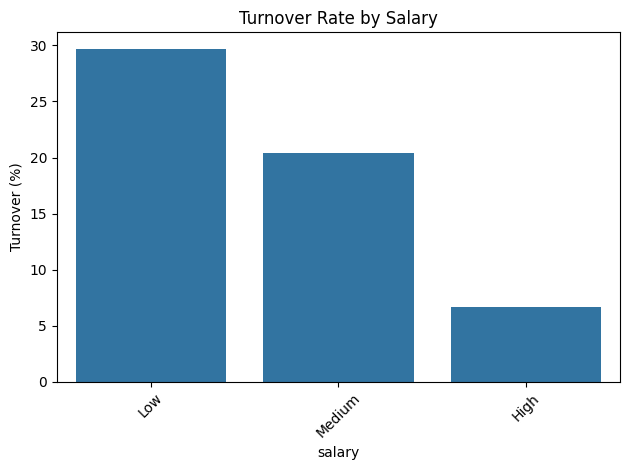

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Turnover by Salary
sns.barplot(x=Turnover_rate_by_salary_sorted.index, y=Turnover_rate_by_salary_sorted.values)
plt.xticks(rotation=45)
plt.title("Turnover Rate by Salary")
plt.ylabel("Turnover (%)")
plt.tight_layout()

plt.show()

In [ ]:
Turnover_rate_by_salary.to_csv("Turnover_rate_by_salary.csv")

In [30]:
Turnover_rate_by_satisfaction = data.groupby('satisfaction_level')['left'].mean() * 100

Turnover_rate_by_satisfaction_sorted = Turnover_rate_by_satisfaction.sort_values(ascending=False)

print(Turnover_rate_by_satisfaction_sorted)

satisfaction_level
0.09    100.000000
0.10    100.000000
0.11    100.000000
0.38     81.481481
0.40     80.861244
           ...    
0.96      0.000000
0.97      0.000000
0.98      0.000000
0.99      0.000000
1.00      0.000000
Name: left, Length: 92, dtype: float64


In [29]:
Turnover_rate_by_satisfaction_sorted.to_csv("Turnover_rate_by_satisfaction.csv")

In [51]:
Turnover_rate_by_time_spend = data.groupby('time_spend_company')['left'].mean() * 100

Turnover_rate_by_time_spend_sorted = Turnover_rate_by_time_spend.sort_values(ascending=False)

print(Turnover_rate_by_time_spend_sorted)

time_spend_company
5     56.551256
4     34.806414
6     29.108635
3     24.615862
2      1.633785
7      0.000000
8      0.000000
10     0.000000
Name: left, dtype: float64


In [25]:
Turnover_rate_by_time_spend_sorted.to_csv("Turnover_rate_by_time_spend.csv")

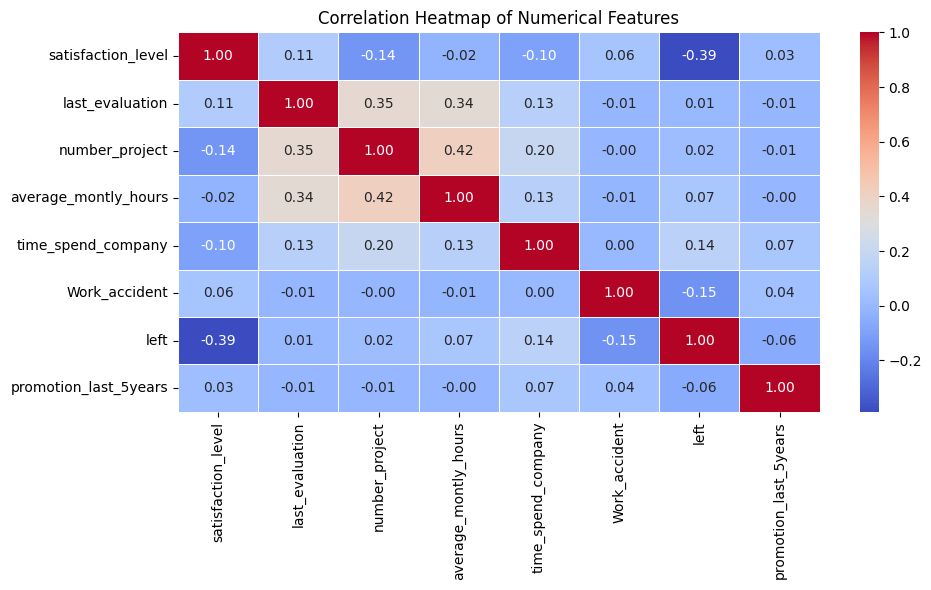

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr(numeric_only=True)


plt.figure(figsize=(10, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


Machine Learning: In this section, we applied a supervised machine learning model to predict whether an employee will leave the company (left = 1) based on several behavioral and organizational features.



In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop('left', axis=1)
y = data['left']

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)
print(f"Acurácia: {modelo.score(X_test, y_test):.2f}")


Acurácia: 0.99


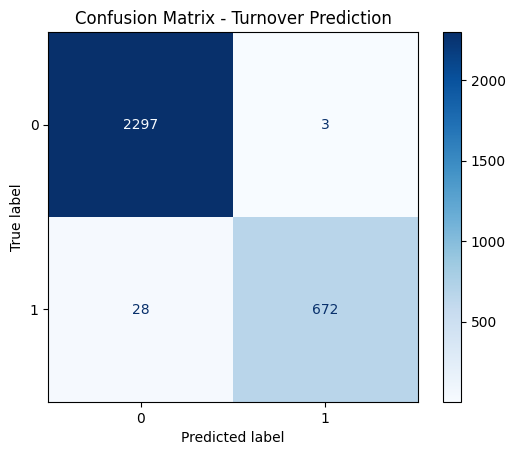

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions
y_pred = modelo.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Turnover Prediction')
plt.show()


This gives a clear visual of how many employees were correctly predicted to stay or leave.

### ✅ Conclusion

This analysis revealed that turnover is significantly higher in departments such as Sales and HR. Satisfaction level and tenure are also strong predictors of employee departure. These insights can guide HR strategies to improve retention.


## 📌 Key Insights
- Sales department has the highest turnover (35%)
- Low salary levels show significantly higher turnover
- Longer tenure (4+ years) correlates with increased exits
- Low satisfaction strongly predicts departure
